<a href="https://colab.research.google.com/github/abuisrar8/Customer-Churn-Analysis/blob/main/customer_churn_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
import pandas as pd

data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].count() == data.shape[0]

False

In [5]:
data['TotalCharges'].isna().sum()

11

In [6]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [7]:
data['TotalCharges'].isna().sum()


0

In [8]:
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)


In [9]:
print(data.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


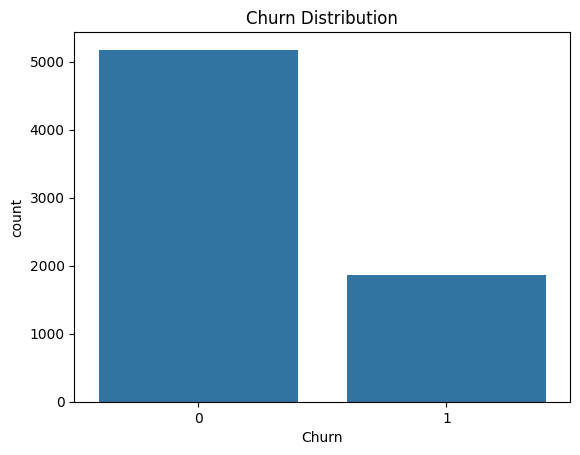

Churn
0    73.463013
1    26.536987
Name: count, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()
print(100*data['Churn'].value_counts()/len(data))



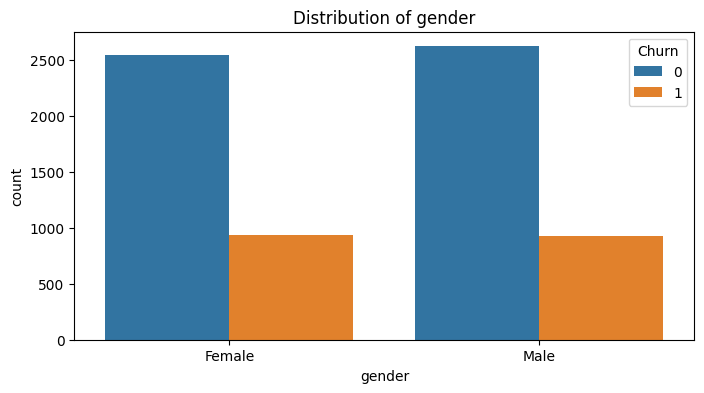

Data Distribution 
gender
Male      50.47565
Female    49.52435
Name: count, dtype: float64

Churn rate for gender:
gender
Female    26.920872
Male      26.160338
Name: Churn, dtype: float64 




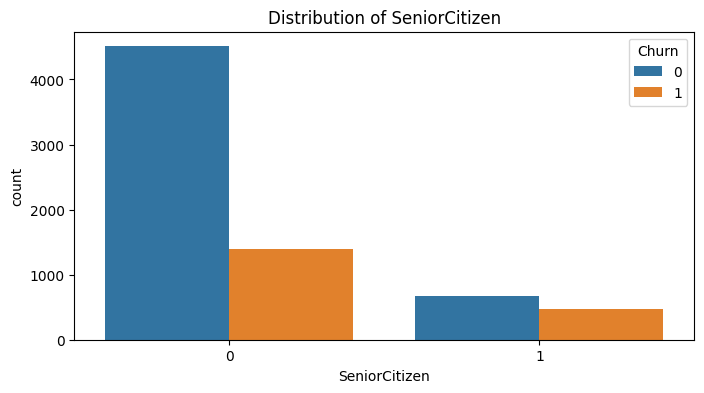

Data Distribution 
SeniorCitizen
0    83.785319
1    16.214681
Name: count, dtype: float64

Churn rate for SeniorCitizen:
SeniorCitizen
0    23.606168
1    41.681261
Name: Churn, dtype: float64 




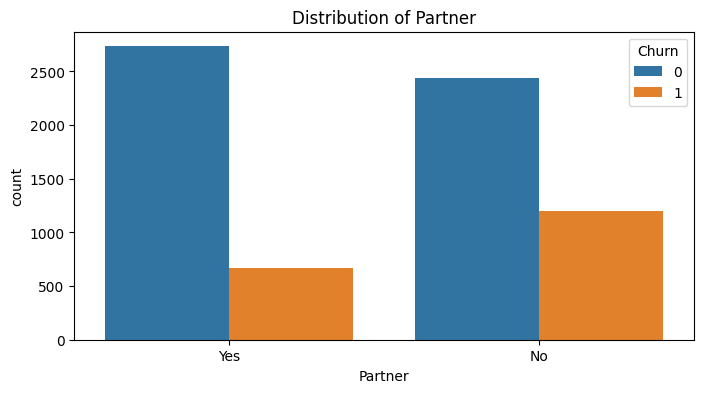

Data Distribution 
Partner
No     51.69672
Yes    48.30328
Name: count, dtype: float64

Churn rate for Partner:
Partner
No     32.957979
Yes    19.664903
Name: Churn, dtype: float64 




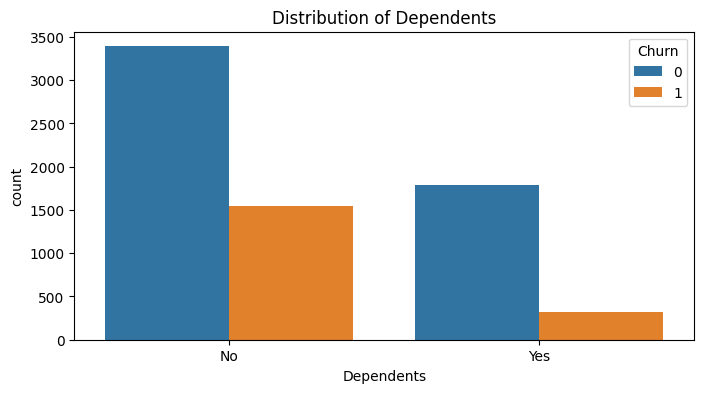

Data Distribution 
Dependents
No     70.041176
Yes    29.958824
Name: count, dtype: float64

Churn rate for Dependents:
Dependents
No     31.279140
Yes    15.450237
Name: Churn, dtype: float64 




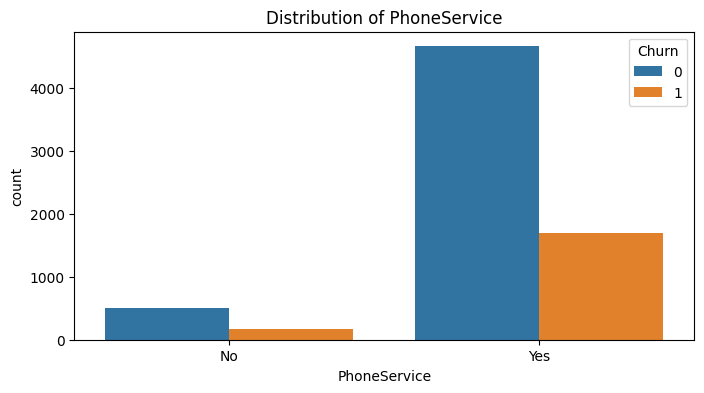

Data Distribution 
PhoneService
Yes    90.316626
No      9.683374
Name: count, dtype: float64

Churn rate for PhoneService:
PhoneService
No     24.926686
Yes    26.709637
Name: Churn, dtype: float64 




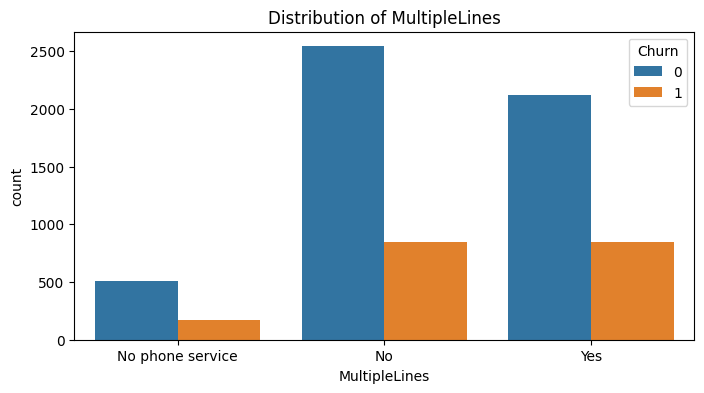

Data Distribution 
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: count, dtype: float64

Churn rate for MultipleLines:
MultipleLines
No                  25.044248
No phone service    24.926686
Yes                 28.609896
Name: Churn, dtype: float64 




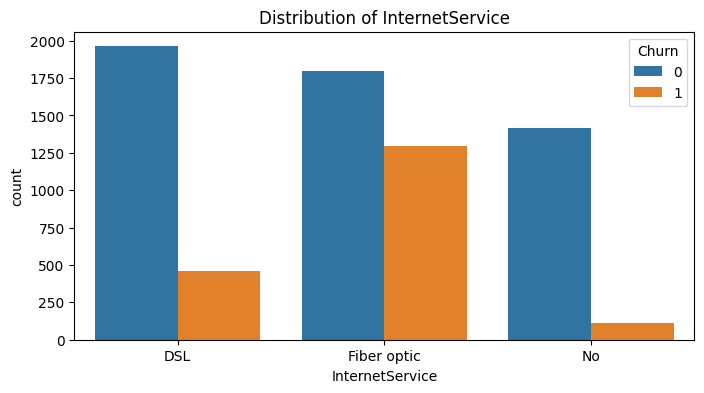

Data Distribution 
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: count, dtype: float64

Churn rate for InternetService:
InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Churn, dtype: float64 




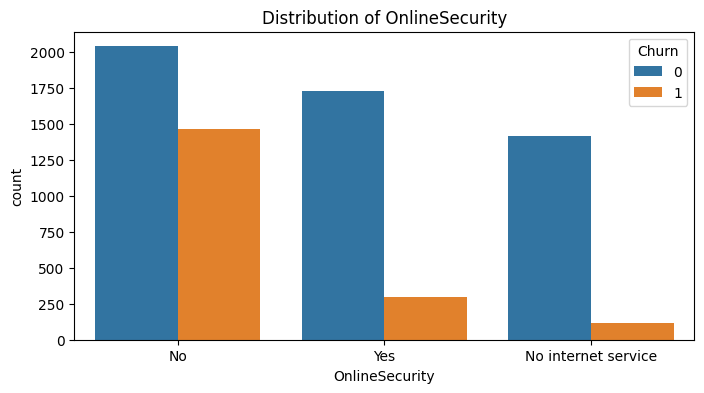

Data Distribution 
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: count, dtype: float64

Churn rate for OnlineSecurity:
OnlineSecurity
No                     41.766724
No internet service     7.404980
Yes                    14.611194
Name: Churn, dtype: float64 




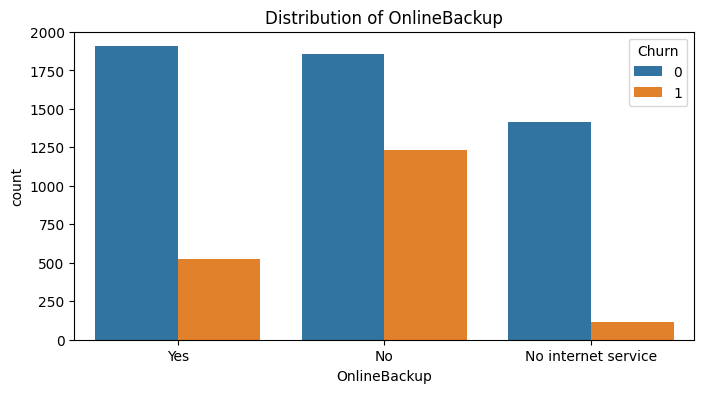

Data Distribution 
OnlineBackup
No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: count, dtype: float64

Churn rate for OnlineBackup:
OnlineBackup
No                     39.928756
No internet service     7.404980
Yes                    21.531494
Name: Churn, dtype: float64 




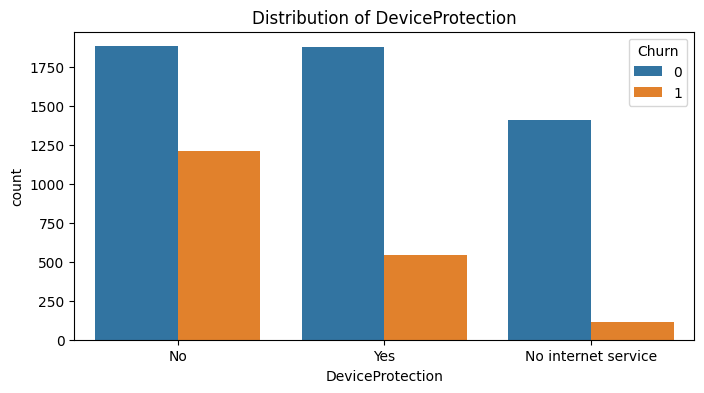

Data Distribution 
DeviceProtection
No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: count, dtype: float64

Churn rate for DeviceProtection:
DeviceProtection
No                     39.127625
No internet service     7.404980
Yes                    22.502064
Name: Churn, dtype: float64 




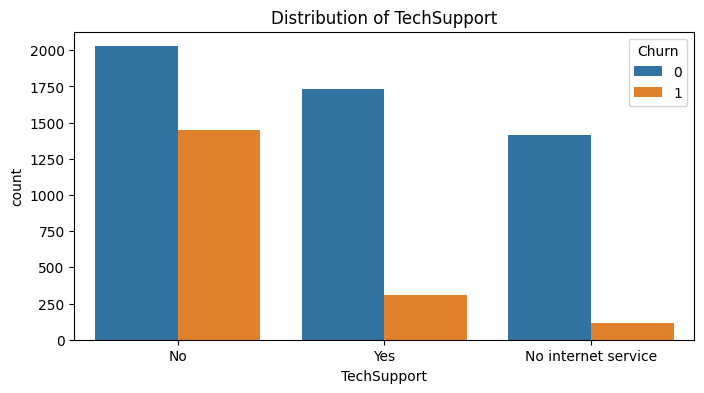

Data Distribution 
TechSupport
No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: count, dtype: float64

Churn rate for TechSupport:
TechSupport
No                     41.635474
No internet service     7.404980
Yes                    15.166341
Name: Churn, dtype: float64 




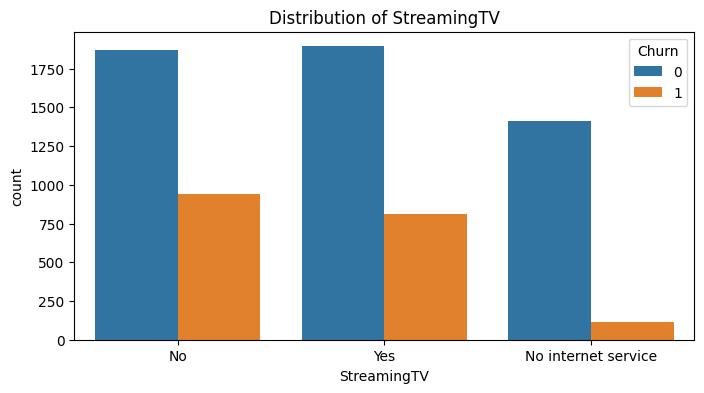

Data Distribution 
StreamingTV
No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: count, dtype: float64

Churn rate for StreamingTV:
StreamingTV
No                     33.523132
No internet service     7.404980
Yes                    30.070188
Name: Churn, dtype: float64 




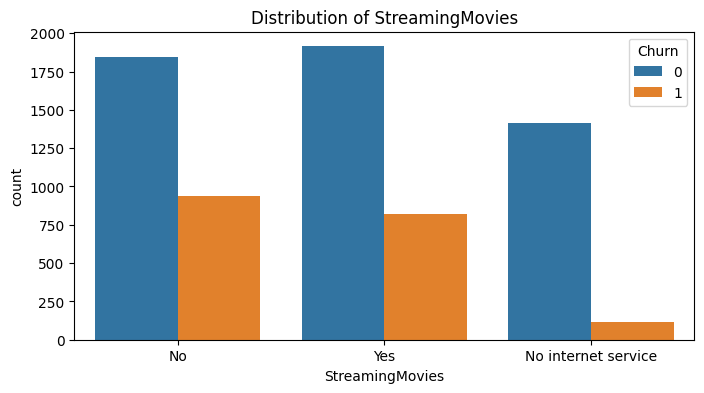

Data Distribution 
StreamingMovies
No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: count, dtype: float64

Churn rate for StreamingMovies:
StreamingMovies
No                     33.680431
No internet service     7.404980
Yes                    29.941435
Name: Churn, dtype: float64 




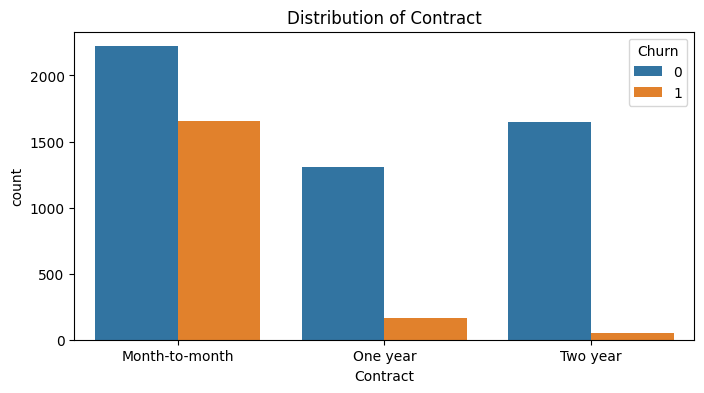

Data Distribution 
Contract
Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: count, dtype: float64

Churn rate for Contract:
Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64 




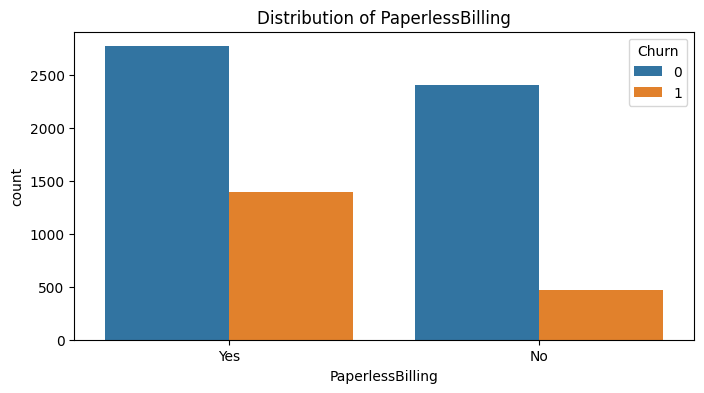

Data Distribution 
PaperlessBilling
Yes    59.221922
No     40.778078
Name: count, dtype: float64

Churn rate for PaperlessBilling:
PaperlessBilling
No     16.330084
Yes    33.565092
Name: Churn, dtype: float64 




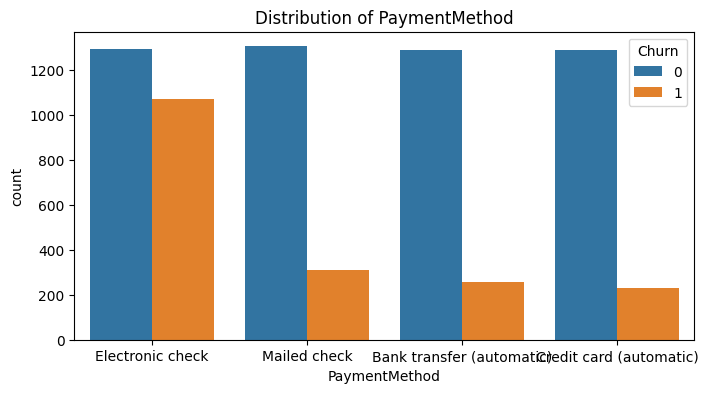

Data Distribution 
PaymentMethod
Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: count, dtype: float64

Churn rate for PaymentMethod:
PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn, dtype: float64 




In [11]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=data, hue='Churn')
    plt.title(f'Distribution of {feature}')
    plt.show()
    print("Data Distribution ")
    print(100*data[feature].value_counts()/len(data))

    churn_rate = 100 * data.groupby(feature)['Churn'].mean()
    print(f"\nChurn rate for {feature}:")
    print(churn_rate ,"\n\n")


# Observations:

### 1. Churn Distribution:
 - Majority of customers (73.4%) do not churn.
 - Churned customers represent a significant minority (26.6%).

### 2. Categorical Feature Analysis:
- Gender: Churn rate is slightly higher for females.
- SeniorCitizen: Senior citizens have a higher churn rate.
- Partner: Customers with partners have a lower churn rate.
- Dependents: Customers with dependents have a lower churn rate.
- PhoneService: Customers without phone service have a higher churn rate.
- MultipleLines: Customers with multiple lines have a lower churn rate.
- InternetService: Customers with fiber optic internet have the lowest churn rate.
- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: Customers with these services have a lower churn rate.
- StreamingTV, StreamingMovies: Customers with these services have a higher churn rate.
- Contract: Customers with month-to-month contracts have the highest churn rate.
- PaperlessBilling: Customers with paperless billing have a slightly lower churn rate.
- PaymentMethod: Customers with electronic check payment have the highest churn rate.

# Actions:

1. Target Senior Citizens and customers without partners/dependents with personalized offers and incentives to reduce churn.
2. Promote bundled services like multiple lines, internet, and TV to reduce churn.
3. Offer discounts or promotions to customers upgrading to fiber optic internet.
4. Emphasize the benefits of additional services like online security, backup, and device protection to reduce churn.
5. Consider offering flexible contract options to reduce churn among month-to-month customers.
6. Encourage customers to sign up for paperless billing to slightly reduce churn.
7. Explore alternative payment methods with lower churn rates, such as credit cards or bank transfers.


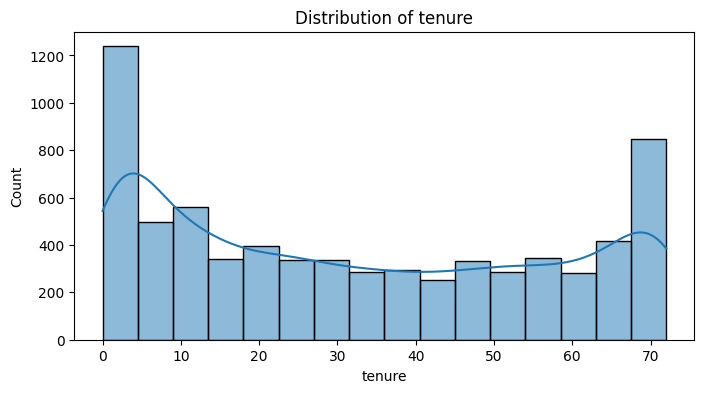

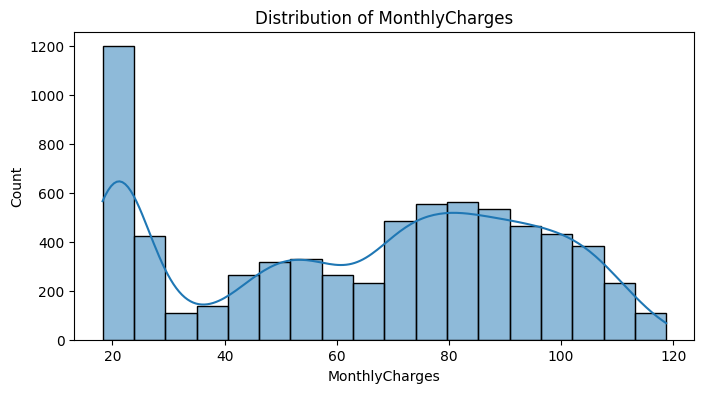

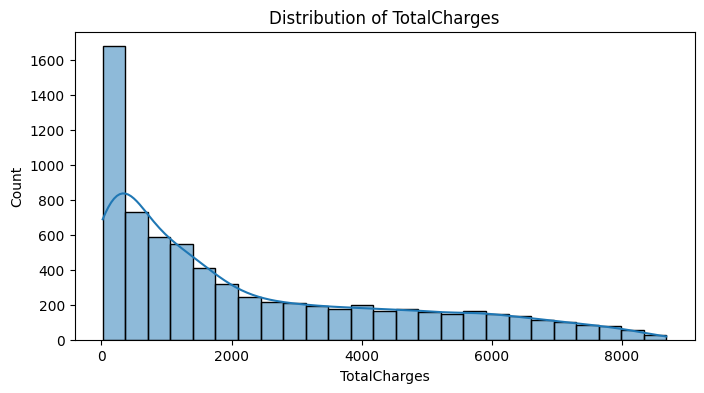

In [14]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data[feature],kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    print("\n\n")

# Observations:

### 1. Tenure:
 - Most customers have a tenure of less than 20 months.
 - There is a gradual decrease in the number of customers with increasing tenure.

### 2. MonthlyCharges:
 - The distribution is slightly right-skewed, indicating that most customers have lower monthly charges.
 - There is a small peak around 20 dollar and a larger peak around  $ 60 -$ 70.





### 3. TotalCharges:
 - The distribution is heavily right-skewed, with most customers having lower total charges.
 - There are a few outliers with very high total charges.

# Actions:

1. Offer targeted promotions to customers with low tenure to increase customer retention.
2. Consider creating pricing plans with lower monthly charges to attract more customers.
3. Analyze the reasons behind the high total charges for outliers and address them accordingly.


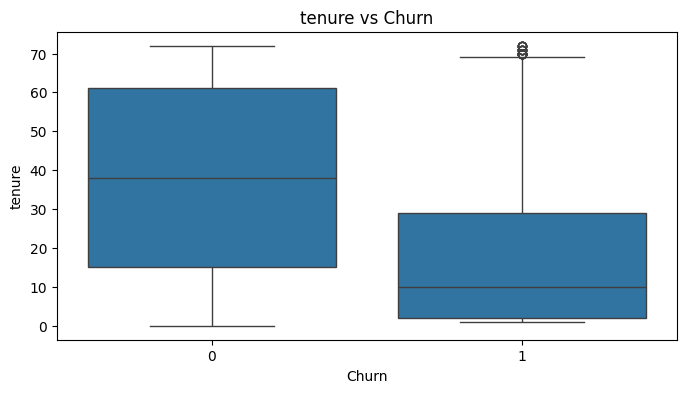



Outliers for tenure:
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64





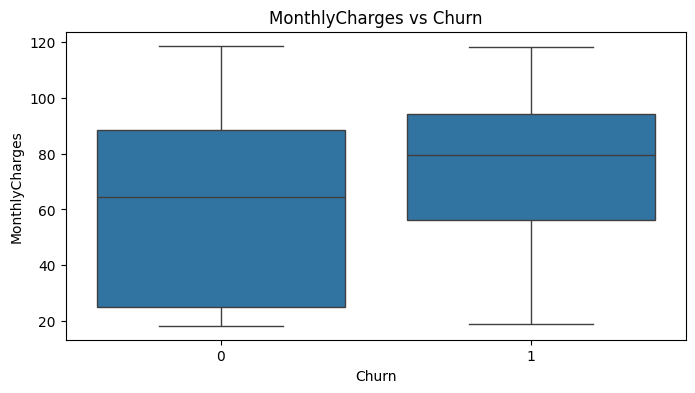



Outliers for MonthlyCharges:
MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: count, Length: 1585, dtype: int64





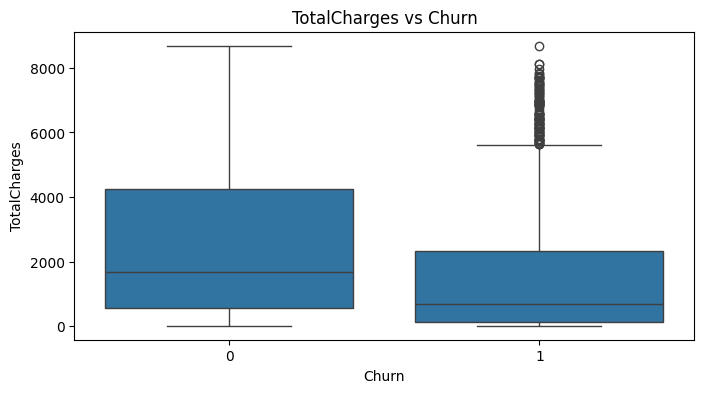



Outliers for TotalCharges:
TotalCharges
1397.475    11
20.200      11
19.750       9
20.050       8
19.900       8
            ..
6849.400     1
692.350      1
130.150      1
3211.900     1
6844.500     1
Name: count, Length: 6531, dtype: int64





In [19]:
for feature in numerical_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn',y=feature,data=data)
    plt.title(f'{feature} vs Churn')
    plt.show()
    print("\n")

    IQR = data[feature].quantile(0.75) - data[feature].quantile(0.25)
    lower_bound = data[feature].quantile(0.25) - 1.5 * IQR
    upper_bound = data[feature].quantile(0.75) + 1.5 * IQR
    outliers = data[((data[feature] >= lower_bound) & (data[feature] <= upper_bound))]

    print(f"Outliers for {feature}:")
    print(outliers[feature].value_counts())
    print("\n\n")

### Tenure:
 - Customers with higher tenure (above 50 months) are less likely to churn.
 - There are a few outliers with very low tenure (below 10 months) who churned.

### MonthlyCharges:
 - Customers with higher monthly charges (above $80) are more likely to churn.
 - There are a few outliers with very low monthly charges (below $20) who churned.

### TotalCharges:
 - Customers with higher total charges (above $4,000) are more likely to churn.
 - There are a few outliers with very low total charges (below $1,000) who churned.

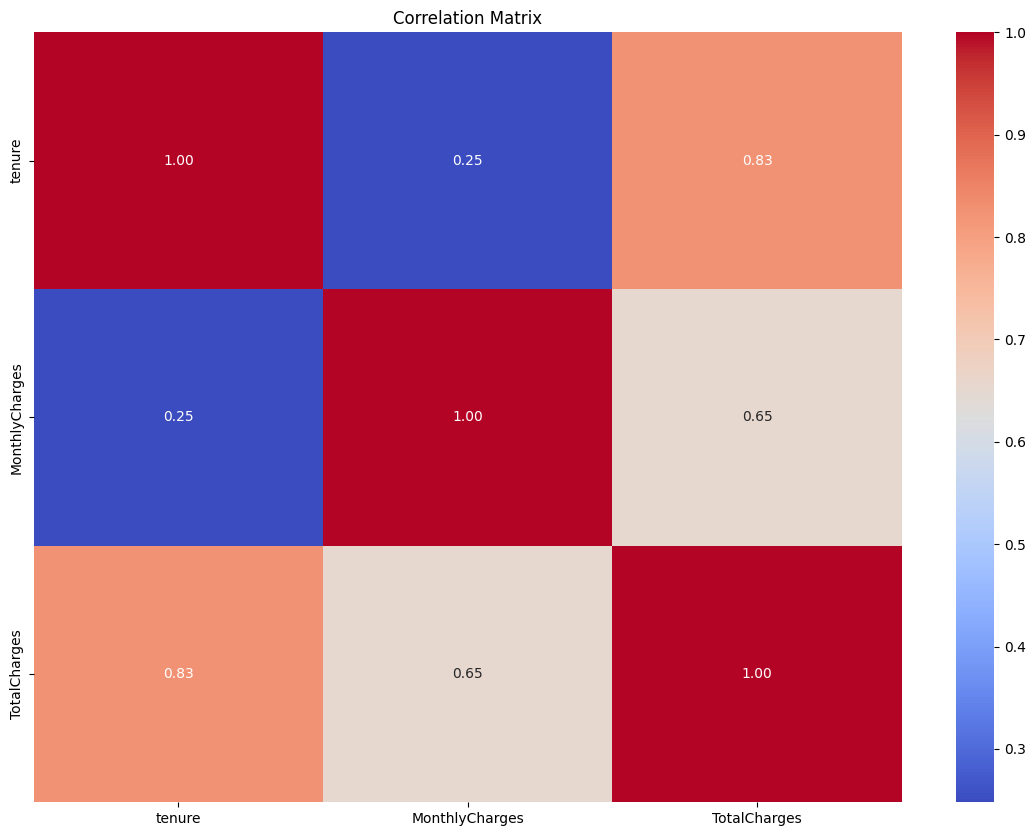

In [23]:
plt.figure(figsize=(14,10))
sns.heatmap(data[numerical_features].corr(), annot= True, cmap ='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Based on the heatmap, the following observations can be made:

### 1. Tenure:
- Tenure has a strong positive correlation with TotalCharges (0.82).
- Tenure has a weak positive correlation with MonthlyCharges (0.24).

### 2. MonthlyCharges:
   - MonthlyCharges has a strong positive correlation with TotalCharges (0.65).

### 3. TotalCharges:
 - TotalCharges has a strong positive correlation with Tenure (0.82).
 - TotalCharges has a strong positive correlation with MonthlyCharges (0.65).

These observations suggest that customers with higher tenure and higher monthly charges tend to have higher total charges. This could be due to several factors, such as customers staying with the company for a longer period or opting for more expensive plans.

Further analysis and investigation would be required to determine the specific reasons behind these correlations and their impact on customer churn.


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0
